# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.




### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [77]:
# path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.19_미니프로젝트 6차_3_4일차_실습자료/'

#### 3) 데이터 읽어오기

In [80]:
file1 = 'data1.pkl'

In [81]:
df = joblib.load(path + file1)

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [82]:
# 숫자형 변수 분석
def numeric_analysis(df, col, bins=20):
    display(df[col].describe())
    plt.subplot(2, 1, 1)
    sns.histplot(df[col], kde=True, bins=bins)

    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[col])

    plt.tight_layout()
    plt.show()

count    2916.000000
mean      418.919067
std       133.719577
min       132.000000
25%       278.000000
50%       455.000000
75%       522.000000
max      1413.000000
Name: Cars, dtype: float64

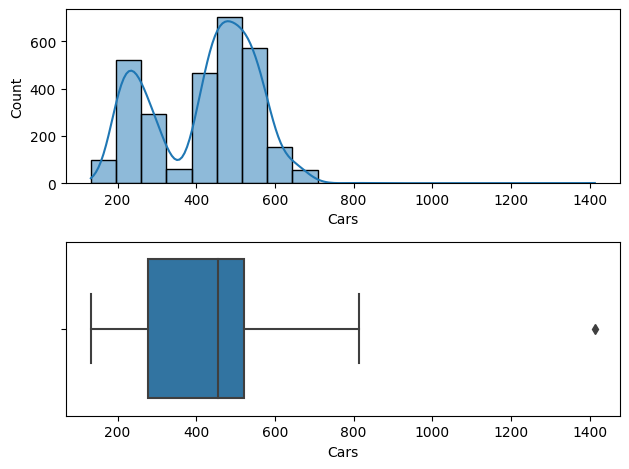

In [83]:
numeric_analysis(df, 'Cars')

In [84]:
# 범주형 변수 분석
def categorical_analysis(df, col, normalize=False):
    display(df[col].value_counts(normalize=normalize))
    sns.countplot(x=df[col])
    plt.show()

2    417
3    417
4    417
1    417
5    416
6    416
0    416
Name: Weekday, dtype: int64

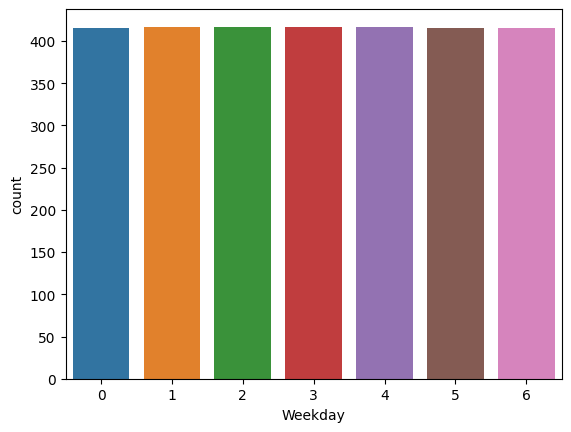

In [85]:
categorical_analysis(df, 'Weekday')

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [86]:
num_cols = df.select_dtypes([int, float]).columns
num_cols

Index(['Cars', 'Submissions', 'Boardings', 'Avg_wait', 'Avg_fare',
       'Avg_distance', 'target', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'Wait_MA7',
       'Boarding_percent'],
      dtype='object')

column : Cars


count    2916.000000
mean      418.919067
std       133.719577
min       132.000000
25%       278.000000
50%       455.000000
75%       522.000000
max      1413.000000
Name: Cars, dtype: float64

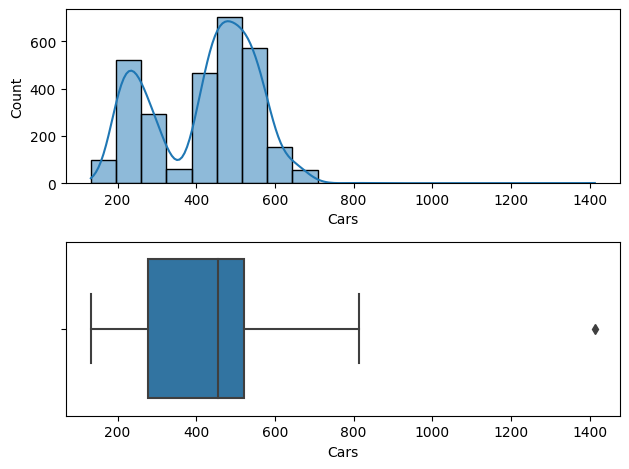

column : Submissions


count    2916.000000
mean     3928.127229
std      1509.300543
min       527.000000
25%      2163.500000
50%      4722.500000
75%      5110.000000
max      6182.000000
Name: Submissions, dtype: float64

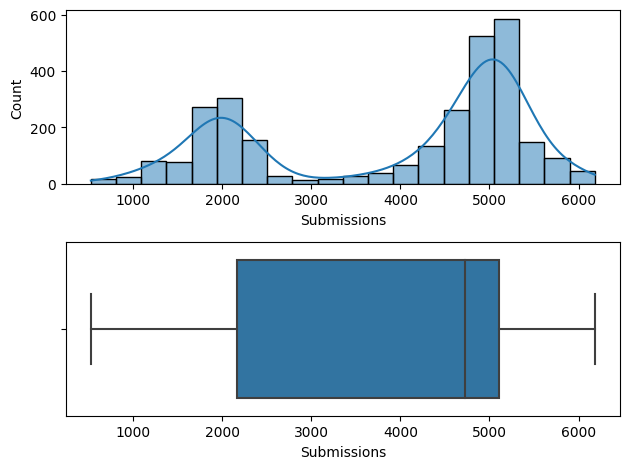

column : Boardings


count    2916.000000
mean     3285.638546
std      1248.972391
min       462.000000
25%      1779.000000
50%      3935.000000
75%      4241.250000
max      5189.000000
Name: Boardings, dtype: float64

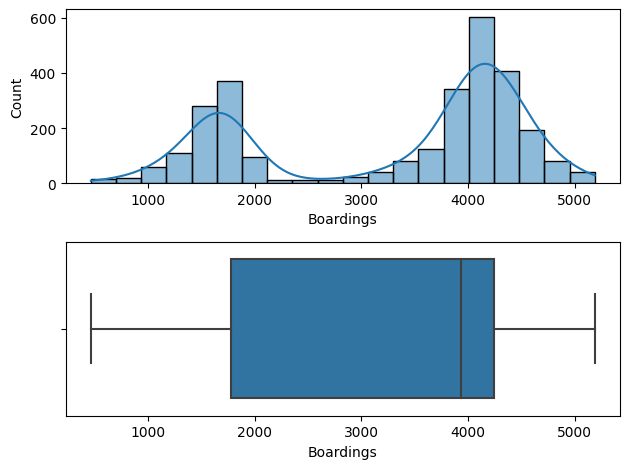

column : Avg_wait


count    2916.000000
mean       40.337037
std        14.094318
min        17.600000
25%        29.700000
50%        38.250000
75%        48.700000
max        96.100000
Name: Avg_wait, dtype: float64

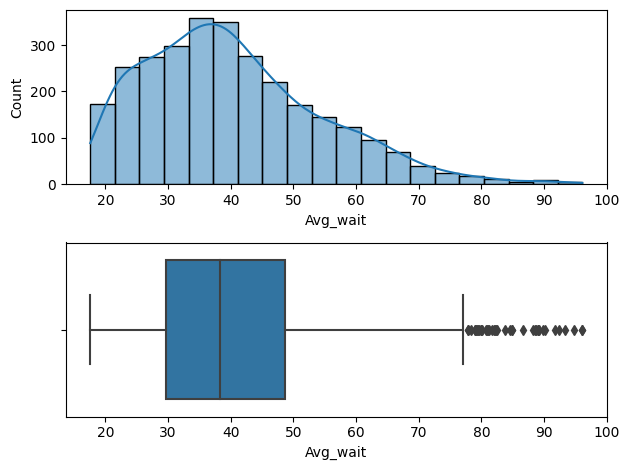

column : Avg_fare


count    2916.000000
mean     2304.340535
std       107.382826
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2401.000000
max      2733.000000
Name: Avg_fare, dtype: float64

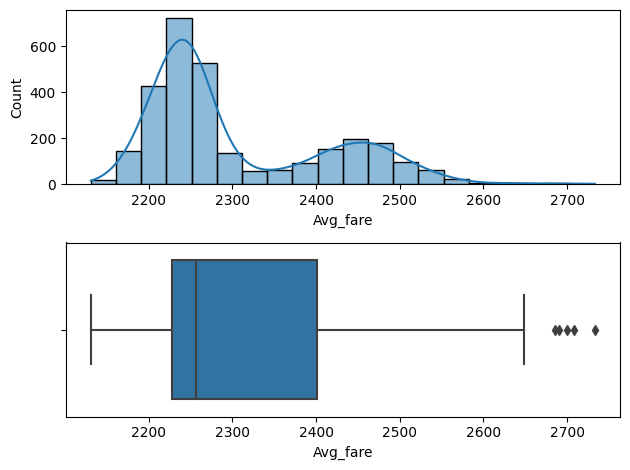

column : Avg_distance


count     2916.000000
mean      9253.533265
std       1020.053563
min       7672.000000
25%       8519.000000
50%       8821.500000
75%      10151.000000
max      14136.000000
Name: Avg_distance, dtype: float64

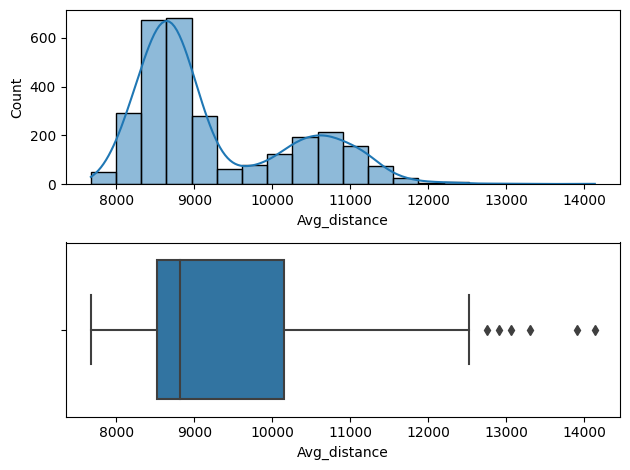

column : target


count    2916.000000
mean       40.340261
std        14.091722
min        17.600000
25%        29.700000
50%        38.250000
75%        48.700000
max        96.100000
Name: target, dtype: float64

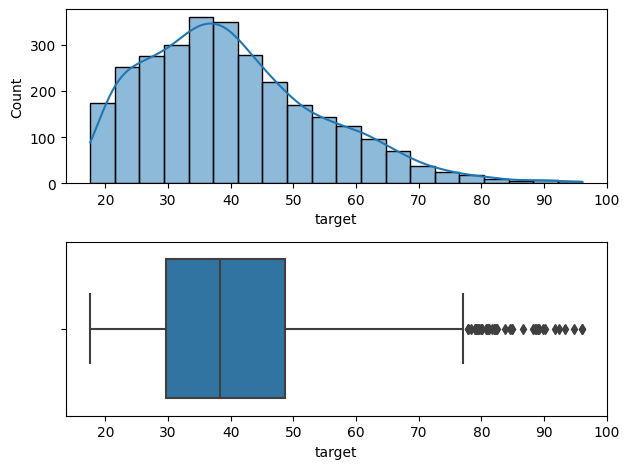

column : temp_max


count    2916.000000
mean       18.109979
std        10.693802
min       -11.200000
25%         9.100000
50%        19.700000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64

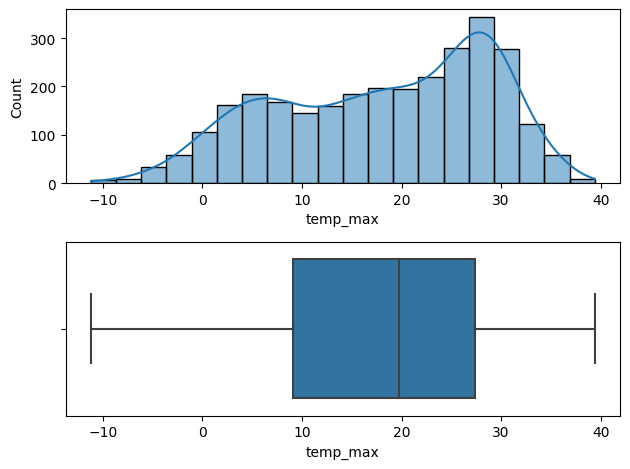

column : temp_min


count    2916.000000
mean        9.446433
std        10.770206
min       -18.500000
25%         0.600000
50%        10.100000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64

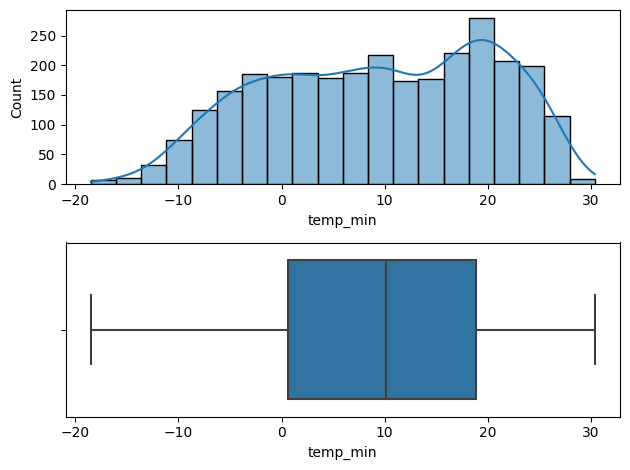

column : rain(mm)


count    2916.000000
mean        3.361351
std        12.607993
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64

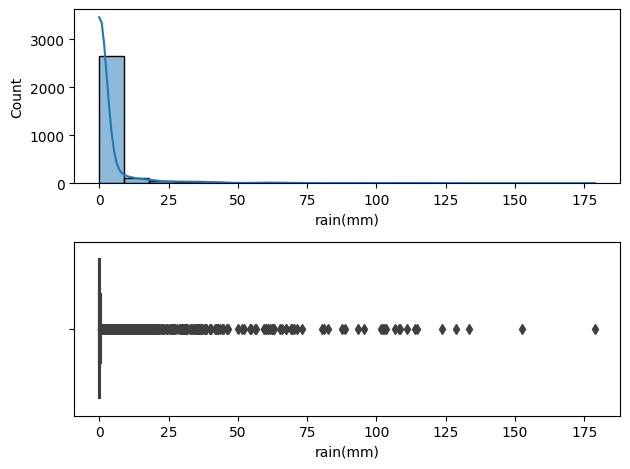

column : humidity_max(%)


count    2916.000000
mean       79.104252
std        14.009508
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64

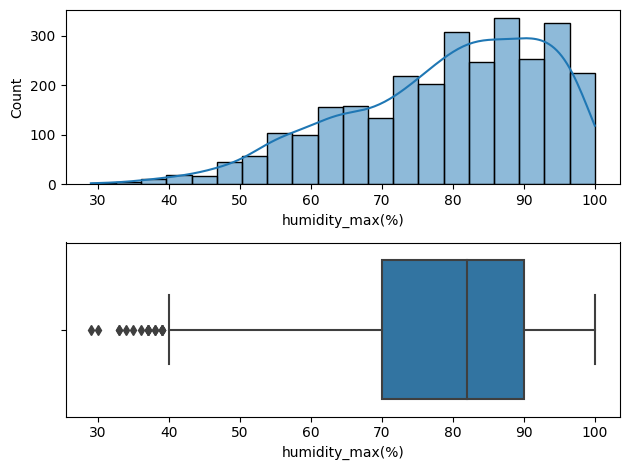

column : humidity_min(%)


count    2916.000000
mean       41.123045
std        16.405522
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64

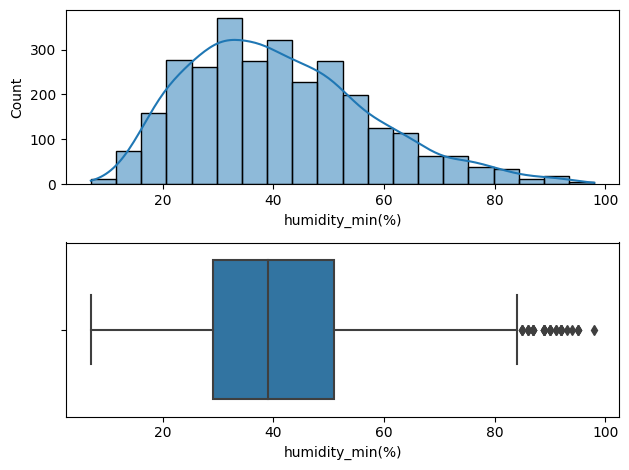

column : sunshine(MJ/m2)


count    2916.000000
mean       13.507054
std         6.942859
min         0.000000
25%         8.247500
50%        12.700000
75%        18.602500
max        30.790000
Name: sunshine(MJ/m2), dtype: float64

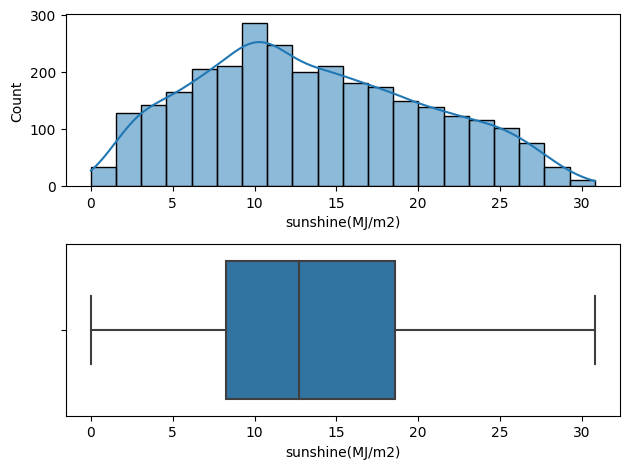

column : Wait_MA7


count    2916.000000
mean       40.316706
std        12.032292
min        18.800000
25%        31.296429
50%        39.042857
75%        47.007143
max        83.928571
Name: Wait_MA7, dtype: float64

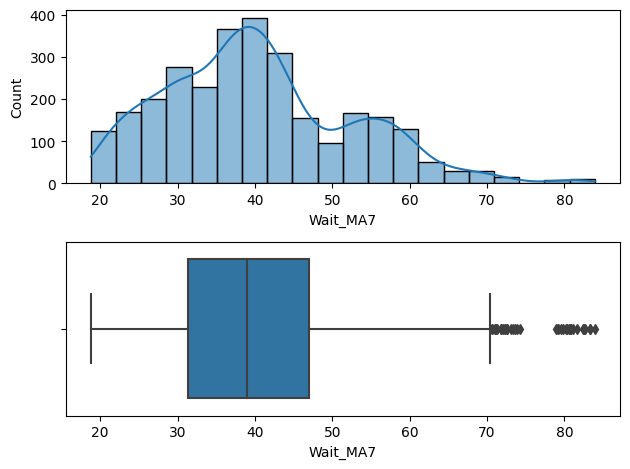

column : Boarding_percent


count    2916.000000
mean        0.841435
std         0.052143
min         0.596996
25%         0.805897
50%         0.845545
75%         0.877657
max         0.968844
Name: Boarding_percent, dtype: float64

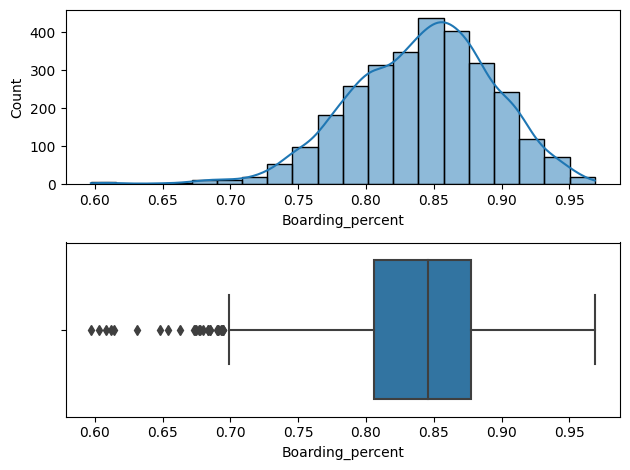

In [87]:
for col in num_cols:
    print("=" * 120)
    print("column :", col)
    numeric_analysis(df, col)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

column : Weekday


2    417
3    417
4    417
1    417
5    416
6    416
0    416
Name: Weekday, dtype: int64

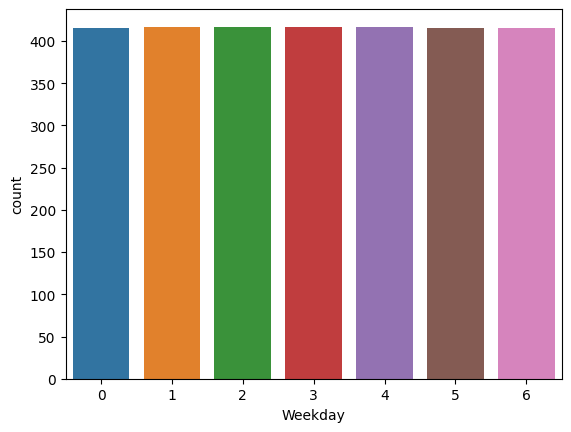

column : Month


10    249
3     248
5     248
7     248
8     248
12    247
1     242
4     240
6     240
9     240
11    240
2     226
Name: Month, dtype: int64

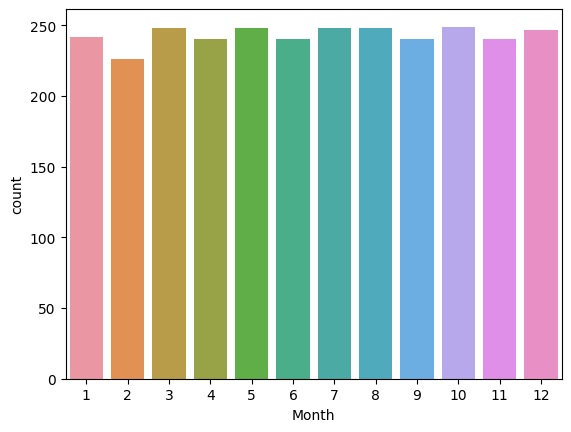

column : Season


spring    736
summer    736
fall      729
winter    715
Name: Season, dtype: int64

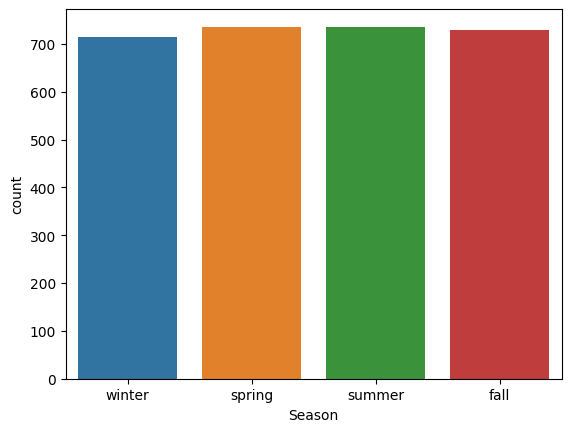

column : Weekend


0    2084
1     832
Name: Weekend, dtype: int64

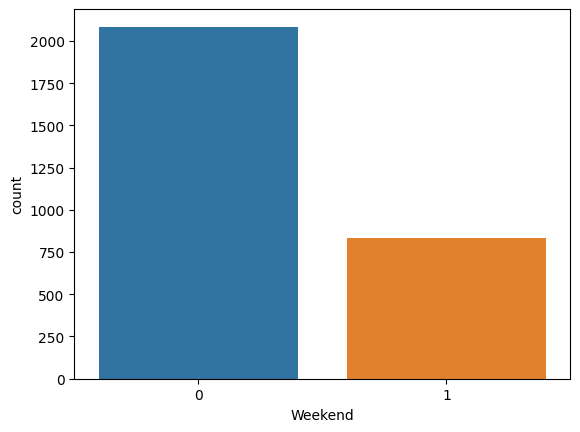

column : Holidays


0    2797
1     119
Name: Holidays, dtype: int64

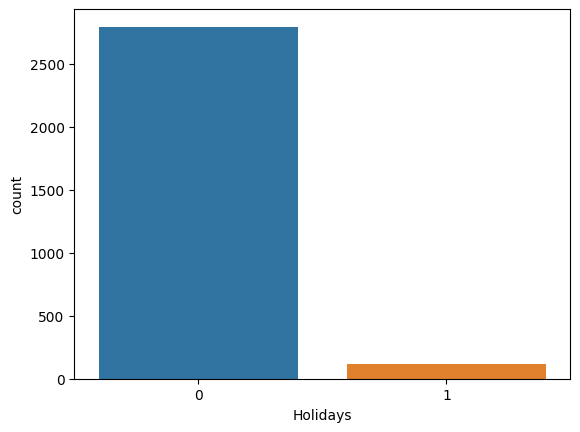

In [88]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print("=" * 120)
    print("column :", col)
    categorical_analysis(df, col)

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

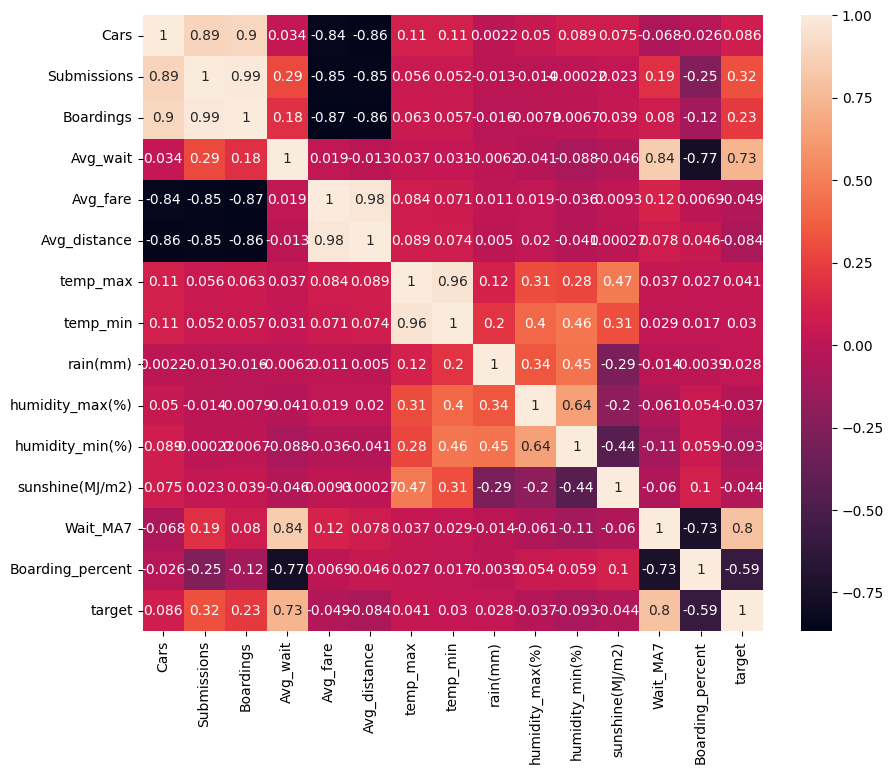

In [89]:
temp = df[num_cols].drop('target', axis=1)
temp['target'] = df['target']

corr = temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

#### 2) 산점도

In [90]:
corr['target'].sort_values(ascending=False)

target              1.000000
Wait_MA7            0.799435
Avg_wait            0.731728
Submissions         0.315238
Boardings           0.228258
Cars                0.086246
temp_max            0.041026
temp_min            0.030223
rain(mm)            0.027977
humidity_max(%)    -0.037092
sunshine(MJ/m2)    -0.043937
Avg_fare           -0.049410
Avg_distance       -0.083864
humidity_min(%)    -0.093242
Boarding_percent   -0.587257
Name: target, dtype: float64

In [91]:
corr['target'].apply(lambda x: abs(x)).sort_values(ascending=False)

target              1.000000
Wait_MA7            0.799435
Avg_wait            0.731728
Boarding_percent    0.587257
Submissions         0.315238
Boardings           0.228258
humidity_min(%)     0.093242
Cars                0.086246
Avg_distance        0.083864
Avg_fare            0.049410
sunshine(MJ/m2)     0.043937
temp_max            0.041026
humidity_max(%)     0.037092
temp_min            0.030223
rain(mm)            0.027977
Name: target, dtype: float64

In [92]:
# 상위 5개. (자기자신 제외 5개)
cols = corr['target'].apply(lambda x: abs(x)).sort_values(ascending=False).index[:1 + 5]

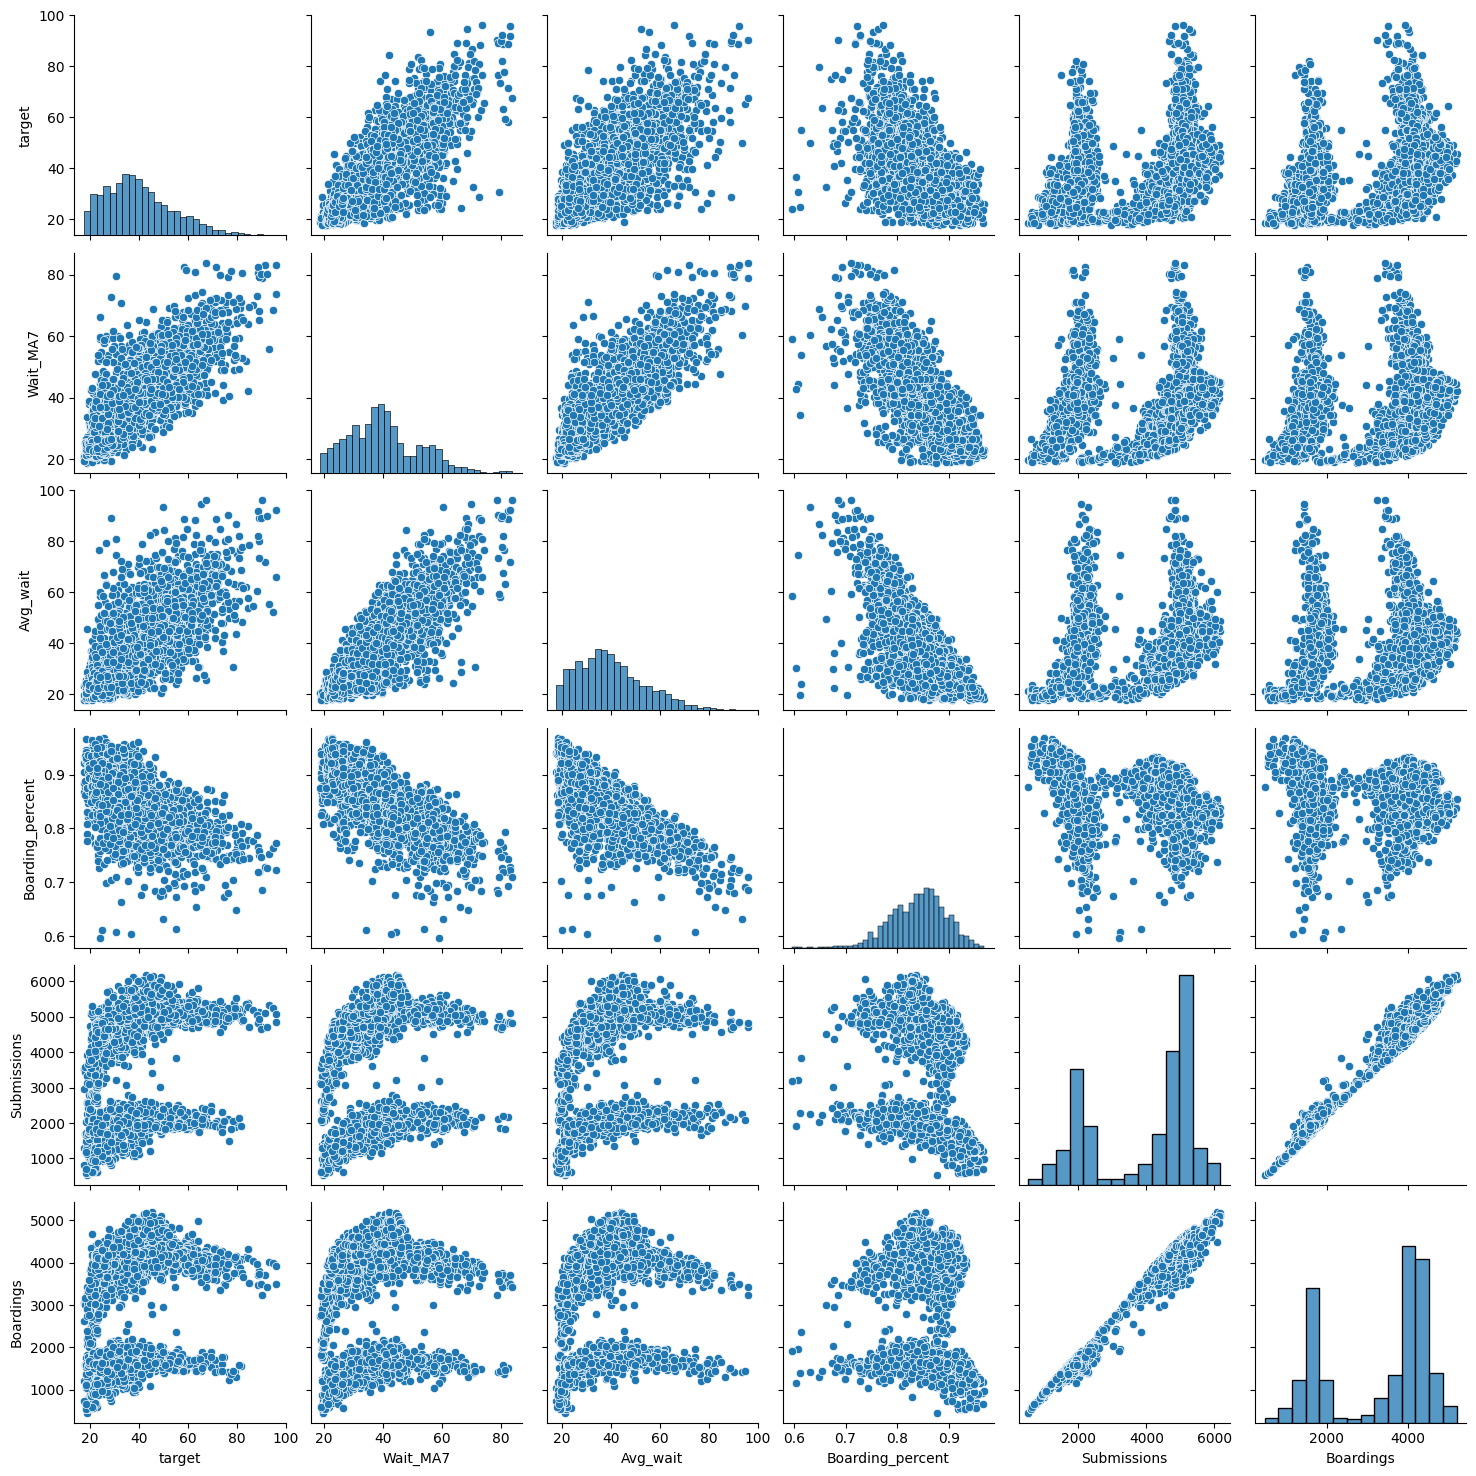

In [93]:
sns.pairplot(df[cols])
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

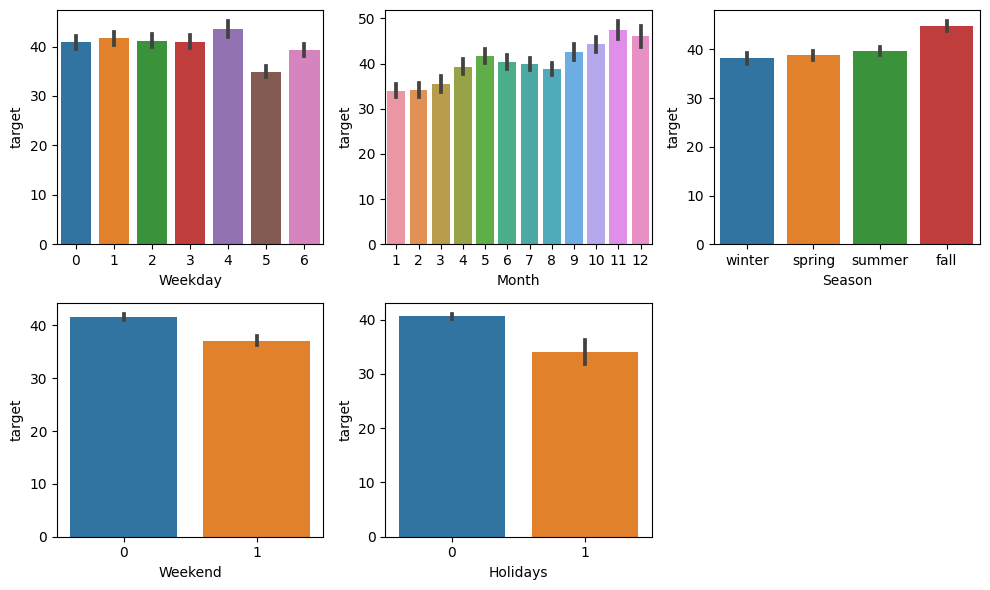

In [94]:
plt.figure(figsize=(10, 6))
for idx, col in enumerate(cat_cols):
    plt.subplot(2, 3, idx + 1)
    sns.barplot(x=col, y='target', data=df)

plt.tight_layout()
plt.show()

In [106]:
# t-test (범주가 2개인 경우 : Weekend, Holidays)
cols = ['Weekend', 'Holidays']
for col in cols:
    a = df.loc[df[col]==0, 'target']
    b = df.loc[df[col]==1, 'target']
    print(col, ":", spst.ttest_ind(a, b))

Weekend : Ttest_indResult(statistic=7.925335537560185, pvalue=3.2103752552329826e-15)
Holidays : Ttest_indResult(statistic=4.973127492245636, pvalue=6.969982354954504e-07)


In [111]:
# ANOVA(분산 분석) (범주가 3개 이상인 경우 : Weekday, Month, Season)
cols = ['Weekday', 'Month', 'Season']
for col in cols:
    classes = df[col].unique()
    for i in range(len(classes)):
        globals()[f'p_{i}'] = df.loc[df[col] == classes[i], 'target']
    input_list = [globals()[f'p_{i}'] for i in range(len(classes))]
    print(col, ":", spst.f_oneway(*input_list))

Weekday : F_onewayResult(statistic=15.703096319056057, pvalue=7.977136666044691e-18)
Month : F_onewayResult(statistic=25.41619502755956, pvalue=6.481618237840667e-51)
Season : F_onewayResult(statistic=34.025404008401615, pvalue=1.310090610349084e-21)


## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [112]:
high_cols = ['Wait_MA7', 'Avg_wait', 'Boarding_percent', 'Weekend', 'Holidays', 'Weekday', 'Month', 'Season']

* 중간(약한) 관계의 변수

In [113]:
mid_cols = ['Submissions', 'Boardings', 'humidity_min(%)']

* (거의) 관계가 없는 변수

In [114]:
low_cols = ['Cars', 'Avg_distance', 'Avg_fare', 'sunshine(MJ/m2)', 'temp_max', 'humidity_max(%)', 'temp_min', 'rain(mm)']

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [116]:
final_df = df.drop(columns=low_cols)

In [119]:
joblib.dump(final_df, path + 'data2.pkl')

['/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.19_미니프로젝트 6차_3_4일차_실습자료/data2.pkl']